## Python and Jupyter 3: Random Walks

A random walk is a process of taking successive steps in a randomized way. Here we will study a one-dimensional (1D) random walk, but it is certainly interesting to exnted these results to more spatial dimensions. Next week in lab you will start to study Brownian motion in 2D, which is closely related. 

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

We will imagine our walker moving along the $y$-axis in integer sized steps. The walker will take one step up the axis, one step down, or stay where they are with equal probability. In this week's example I will start using comments within my code to explain what it does. 

First we define the parameters of the random walk:

In [3]:
dim=1 #This will eventually allow you to change the dimension of your simulation
steps=50
stepset=[-1,0,1] #Walker can go +1,-1, or 0
origin=np.zeros((1,dim)) #Location where the walker begins

Next we write the simulation:

In [4]:
stepArray_shape = (steps, dim) #This fixes the shape of the array that we will store the history of the walker in.
stepVals=np.random.choice(a=stepset, size=stepArray_shape) #This fills the array with randomly chosen steps.
path = np.concatenate([origin, stepVals]).cumsum(0) #This makes a path of those steps by cumulatively adding them up as the walker progresses.
start = path[:1] #The starting point of the walk
stop = path[-1:] #The ending point of the walk
print(stop[0][0])

-6.0


A good practice to make sure your simulation is working well is to plot it. Here's a code that does that. The starting point is marked with a red plus, the ending point with a black dot and all the steps inbetween with blue dashes.

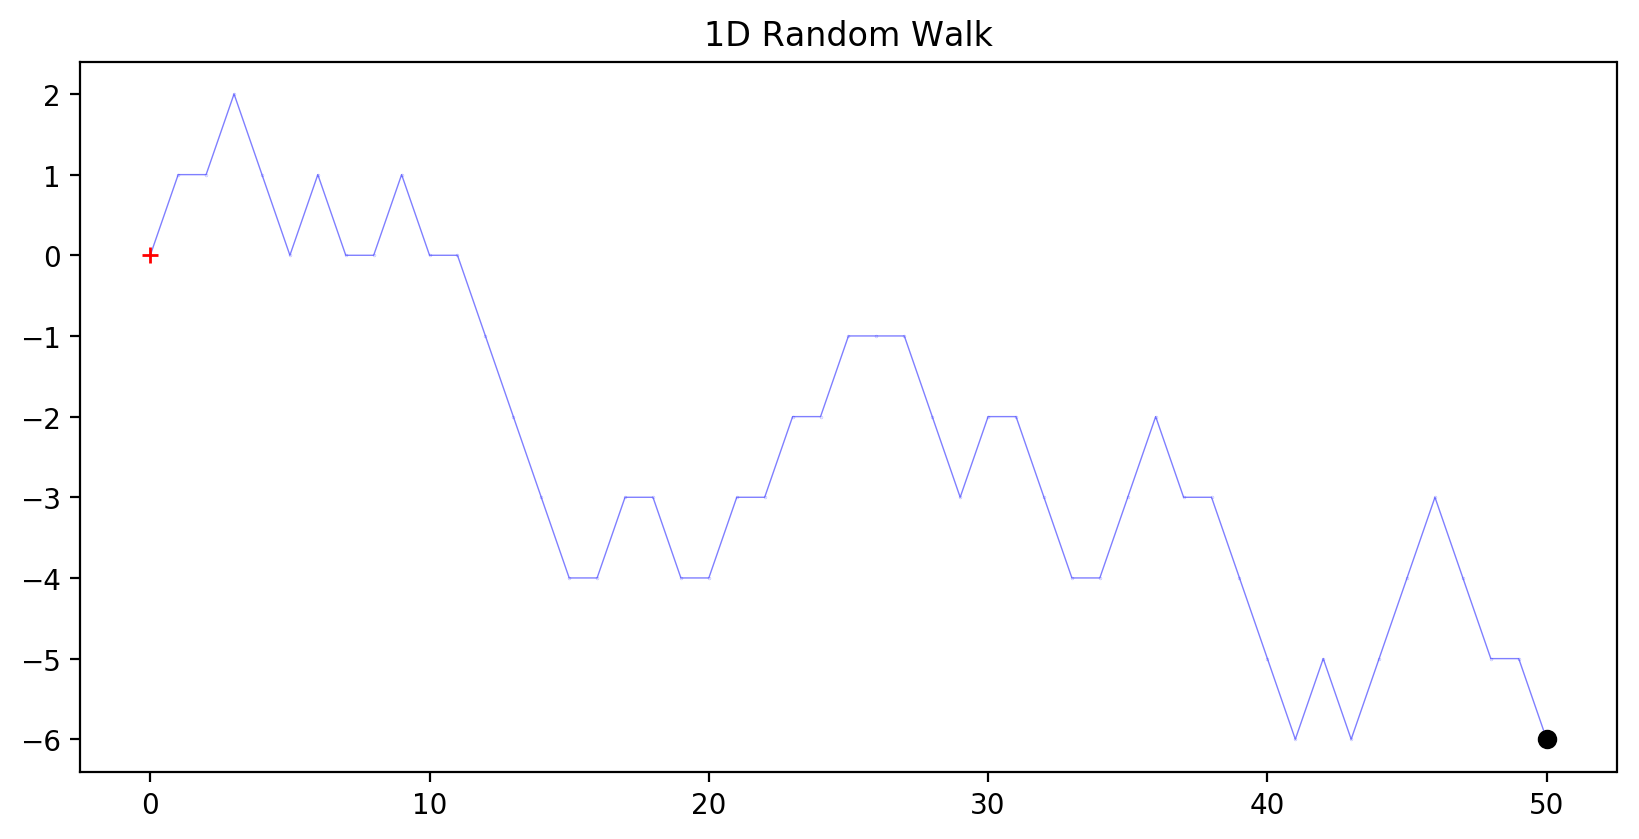

In [5]:
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)

ax.scatter(np.arange(steps+1), path, c='blue',alpha=0.25,s=0.05);
ax.plot(path,c='blue',alpha=0.5,lw=0.5,ls='-',);
ax.plot(0, start, c='red', marker='+')
ax.plot(steps, stop, c='black', marker='o')

plt.title('1D Random Walk')
plt.tight_layout(pad=0)

In order to run the code lots of times for different values of the parameters, I'll wrap it into a function.

In [6]:
def walk(steps):
    dim=1 #This will eventually allow you to change the dimension of your simulation
    stepset=[-1,0,1] #Walker can go +1,-1, or 0
    origin=np.zeros((1,dim)) #Location where the walker begins
    stepArray_shape = (steps, dim) #This fixes the shape of the array that we will store the history of the walker in.
    stepVals=np.random.choice(a=stepset, size=stepArray_shape) #This fills the array with randomly chosen steps.
    path = np.concatenate([origin, stepVals]).cumsum(0) #This makes a path of those steps by cumulatively adding them up as the walker progresses.
    start = path[:1] #The starting point of the walk
    stop = path[-1:] #The ending point of the walk
    return stop[0][0]

In [152]:
data1=[walk(10)**2 for x in range(10)]
data2=[walk(50)**2 for x in range(10)]
data3=[walk(100)**2 for x in range(10)]
data4=[walk(350)**2 for x in range(10)]
data5=[walk(500)**2 for x in range(10)]
data6=[walk(750)**2 for x in range(10)]
data7=[walk(1000)**2 for x in range(10)]

Text(0.5,1,'Mean of Square Displacement for a Random Walk with Variable Number of Steps')

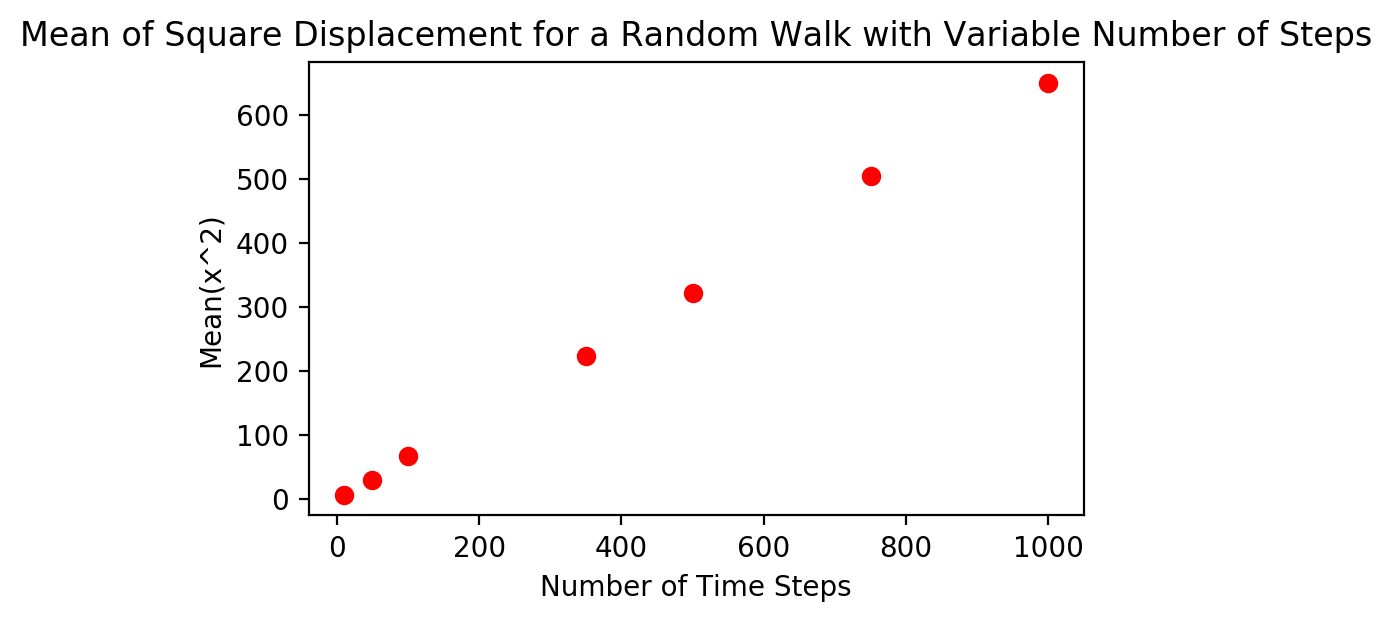

In [165]:
stpvals=[10,50,100,350,500,750,1000]
msqx=[np.mean(data1),np.mean(data2),np.mean(data3),np.mean(data4),np.mean(data5),np.mean(data6),np.mean(data7)]
fig = plt.figure(figsize=(5,3),dpi=200)
plt.plot(stpvals, msqx,'ro')
plt.ylabel('Mean(x^2)')
plt.xlabel('Number of Time Steps')
plt.title('Mean of Square Displacement for a Random Walk with Variable Number of Steps')

Nope, it's not clear what the model should be. So, let's repeat for many more runs.

In [154]:
data1=[walk(10)**2 for x in range(1000)]
data2=[walk(50)**2 for x in range(1000)]
data3=[walk(100)**2 for x in range(1000)]
data4=[walk(350)**2 for x in range(1000)]
data5=[walk(500)**2 for x in range(1000)]
data6=[walk(750)**2 for x in range(1000)]
data7=[walk(1000)**2 for x in range(1000)]

Text(0.5,1,'Mean of Square Displacement for a Random Walk with Variable Number of Steps')

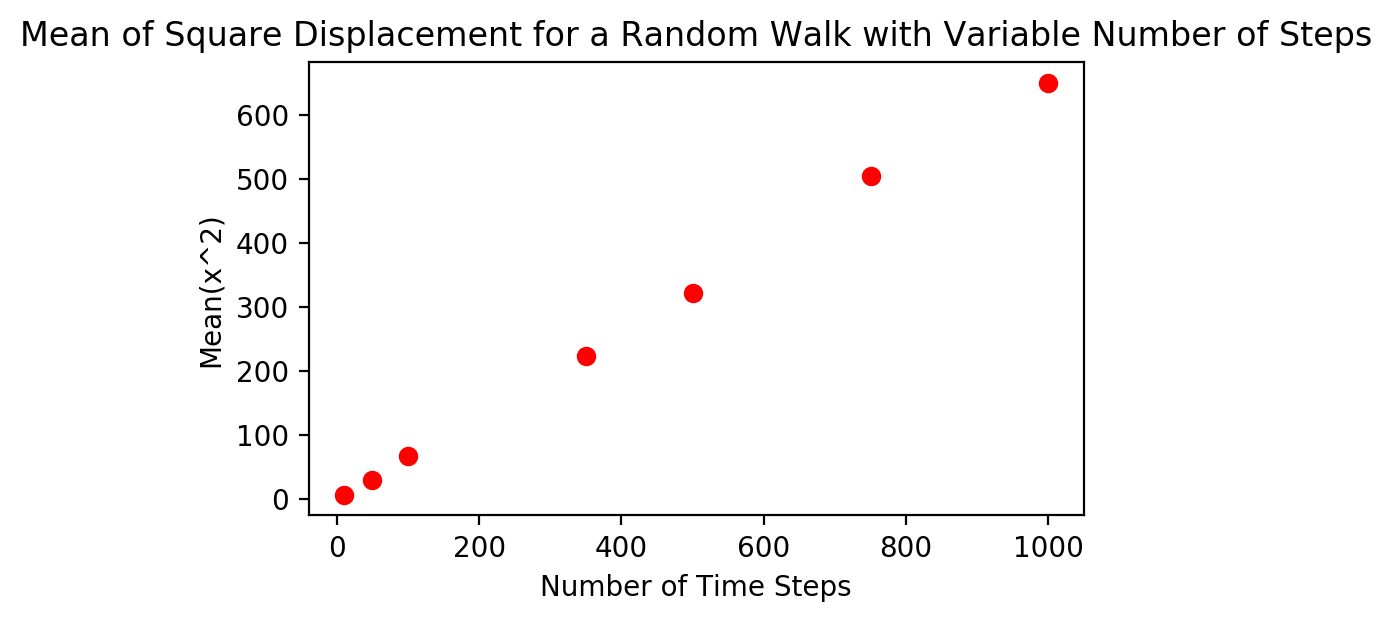

In [167]:
stpvals=[10,50,100,350,500,750,1000]
msqx=[np.mean(data1),np.mean(data2),np.mean(data3),np.mean(data4),np.mean(data5),np.mean(data6),np.mean(data7)]
fig = plt.figure(figsize=(5,3),dpi=200)
plt.plot(stpvals, msqx,'ro')
plt.ylabel('Mean(x^2)')
plt.xlabel('Number of Time Steps')
plt.title('Mean of Square Displacement for a Random Walk with Variable Number of Steps')

Ah, it's a linear relationship. Let's try and see how it goes. 

In [156]:
m,b = np.polyfit(stpvals,msqx,1)
print(m,b) 
line = [m*x+b for x in stpvals]

0.6575160632355872 -1.3374763614602614


Text(0.5,1,'Mean of Square Displacement for a Random Walk with Variable Number of Steps and Linear Fit')

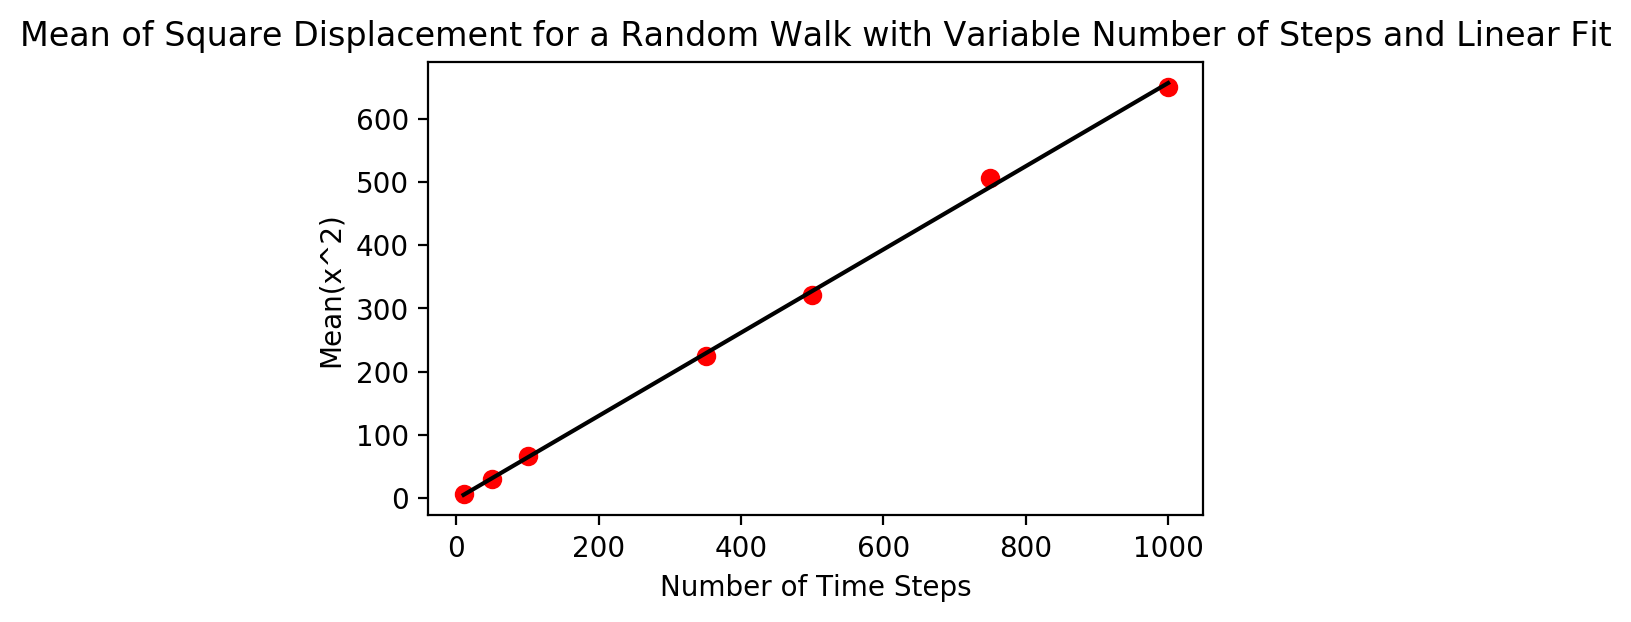

In [168]:
fig = plt.figure(figsize=(5,3),dpi=200)
plt.plot(stpvals, msqx,'ro',stpvals, line,'-k')
plt.ylabel('Mean(x^2)')
plt.xlabel('Number of Time Steps')
plt.title('Mean of Square Displacement for a Random Walk with Variable Number of Steps and Linear Fit')

Looks great! 

Why does this work?

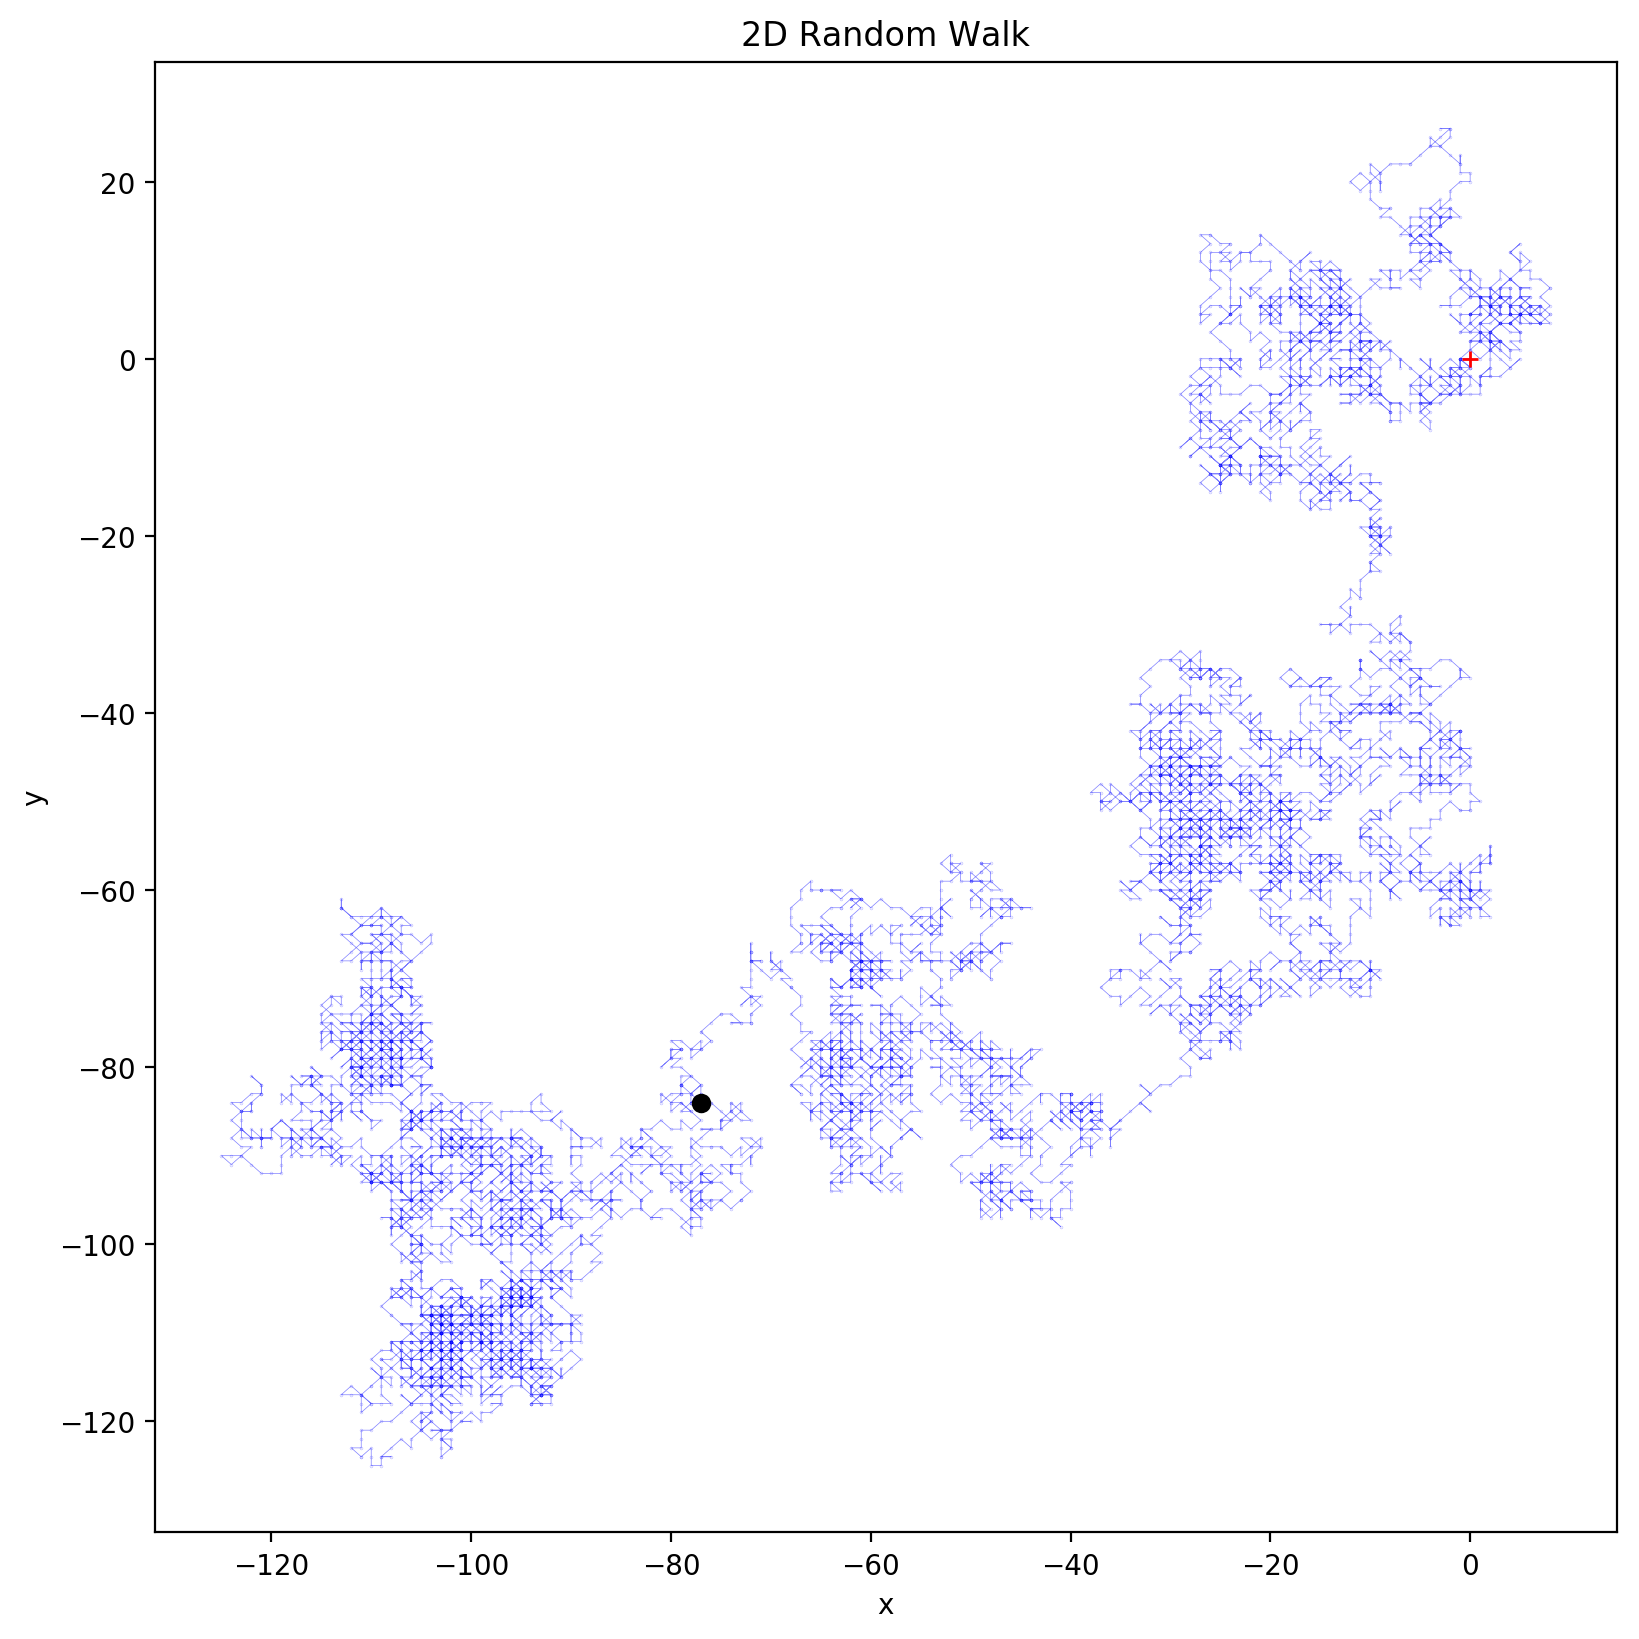

In [9]:
# Define parameters for the walk
dims = 2
steps = 10000
stepset = [-1, 0, 1]
origin = np.zeros((1,dims))

# Simulate steps in 2D
stepshape = (steps,dims)
stepper = np.random.choice(a=stepset, size=stepshape)
path = np.concatenate([origin, stepper]).cumsum(0)
start = path[:1]
stop = path[-1:]

# Plot the path
fig = plt.figure(figsize=(8,8),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(path[:,0], path[:,1],c='blue',alpha=0.25,s=0.05);
ax.plot(path[:,0], path[:,1],c='blue',alpha=0.5,lw=0.25,ls='-');
ax.plot(start[:,0], start[:,1],c='red', marker='+')
ax.plot(stop[:,0], stop[:,1],c='black', marker='o')

plt.title('2D Random Walk')
plt.ylabel('y')
plt.xlabel('x')
plt.tight_layout(pad=0)